Compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic.

* Write a function to take a pandas Series and a degree and return a pandas DataFrame where each column is the Series to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the Series column 2 is the Series squared and column 3 is the Series cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
# using lambda to create polynomial features
tmp = pd.Series([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print(tmp)
print(tmp_cubed)

0    1.0
1    2.0
2    3.0
dtype: float64
0     1.0
1     8.0
2    27.0
dtype: float64


In [3]:
# creating new columns
ex_df = pd.DataFrame()
ex_df['power_1'] = tmp
print(ex_df)

   power_1
0      1.0
1      2.0
2      3.0


In [4]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_df = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_df['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint - 1. We want it to start at 2 and stop at degree
        for power in range(2, degree + 1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_df[name] = feature ** power
    return poly_df
# test it
print(polynomial_dataframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


#### Visualizing polynomial regression

In [5]:
# load data
sales = pd.read_csv("../../ML Data & Script/kc_house_data.csv")
sales.head()

# sort by sqft_living and price (for plotting purposes)
sales = sales.sort_values(by=['sqft_living', 'price'])

In [6]:
# use statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
# use sklearn
from sklearn.linear_model import LinearRegression

In [7]:
# degree one polynomial
X = polynomial_dataframe(sales['sqft_living'], 1)
Y = sales['price'] # add price to the data since it's the target
model_one_sk = LinearRegression()
model_one_sk.fit(X, Y)
print(str(model_one_sk.intercept_) + str(model_one_sk.coef_))

print(model_one_sk.score(X, Y))

-43580.74309447431[280.6235679]
0.49285321790379316


In [8]:
# degree one polynomial
X = polynomial_dataframe(sales['sqft_living'], 1)
Y = sales['price']
X = sm.add_constant(X)
model_one = smf.OLS(Y, X).fit()
model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:35:20   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
power_1      280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#let's take a look at the weights before we plot
print('Parameters: ', model_one.params)

Parameters:  const     -43580.743094
power_1      280.623568
dtype: float64


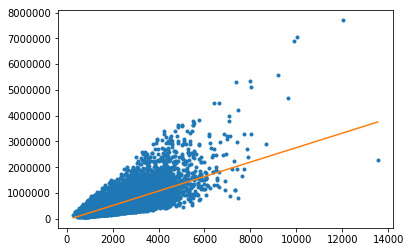

In [10]:
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_one.predict(X),'-')

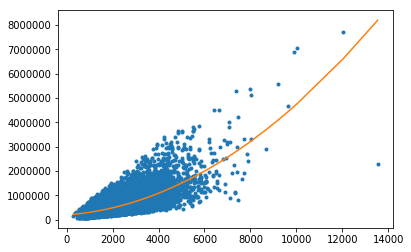

In [11]:
# degree two polynomial
X = polynomial_dataframe(sales['sqft_living'], 2)
Y = sales['price']
X = sm.add_constant(X)
model_two = smf.OLS(Y, X).fit()
model_two.summary()
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_two.predict(X),'-')
plt.show()

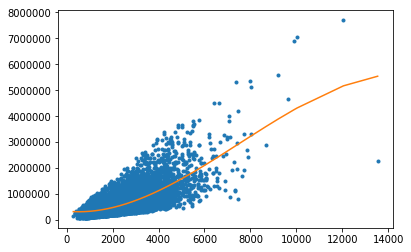

In [12]:
# degree three polynomial
X = polynomial_dataframe(sales['sqft_living'], 3)
Y = sales['price']
X = sm.add_constant(X)
model_three = smf.OLS(Y, X).fit()
model_three.summary()
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_three.predict(X),'-')
plt.show()

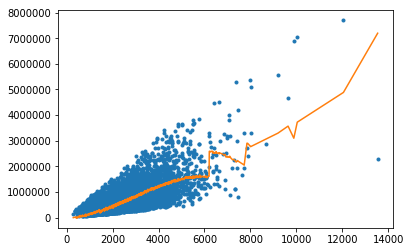

In [13]:
# degree 15 polynomial
X = polynomial_dataframe(sales['sqft_living'], 15)
Y = sales['price']
X = sm.add_constant(X)
model_fifteenth = smf.OLS(Y, X).fit()
model_fifteenth.summary()
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_fifteenth.predict(X),'-')
plt.show()

#### Changing Data and Re-learning

* Split the sales data into four subsets of roughly equal size.
* Estimate a 15th degree polynomial model on all four subsets of the data. 
* Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above).

4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [14]:
# re-read the data to remove the sorting
sales = pd.read_csv("../../ML Data & Script/kc_house_data.csv")
sales = sales[['sqft_living', 'price']]
# randomize data
sales = sales.sample(frac=1,random_state=5)
amount = sales.shape[0] // 4
# create the four sets
set_1 = sales[0:amount * 1].sort_values(by=['sqft_living', 'price'])
set_2 = sales[amount * 1:amount * 2].sort_values(by=['sqft_living', 'price'])
set_3 = sales[amount * 2:amount * 3].sort_values(by=['sqft_living', 'price'])
set_4 = sales[amount * 3:].sort_values(by=['sqft_living', 'price'])

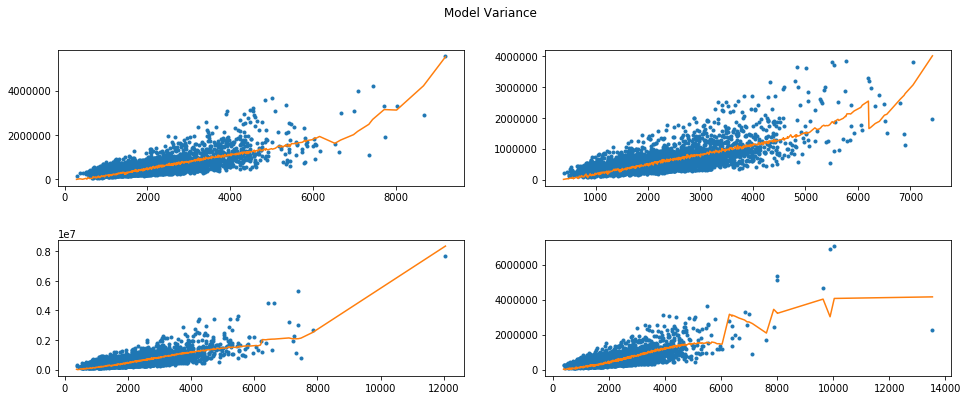

In [15]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Model Variance")
fig.add_subplot(221)

# degree 15 polynomial for set1
X = polynomial_dataframe(set_1['sqft_living'], 15)
Y = set_1['price']
X = sm.add_constant(X)
model_set1 = smf.OLS(Y, X).fit()
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set1.predict(X),'-')

# degree 15 polynomial for set2
X = polynomial_dataframe(set_2['sqft_living'], 15)
Y = set_2['price']
X = sm.add_constant(X)
model_set2 = smf.OLS(Y, X).fit()
fig.add_subplot(222)
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set2.predict(X),'-')

# degree 15 polynomial for set1
X = polynomial_dataframe(set_3['sqft_living'], 15)
Y = set_3['price']
X = sm.add_constant(X)
model_set3 = smf.OLS(Y, X).fit()
fig.add_subplot(223)
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set3.predict(X),'-')

# degree 15 polynomial for set4
X = polynomial_dataframe(set_4['sqft_living'], 15)
Y = set_4['price']
X = sm.add_constant(X)
model_set4 = smf.OLS(Y, X).fit()
fig.add_subplot(224)
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set4.predict(X),'-')
plt.show()

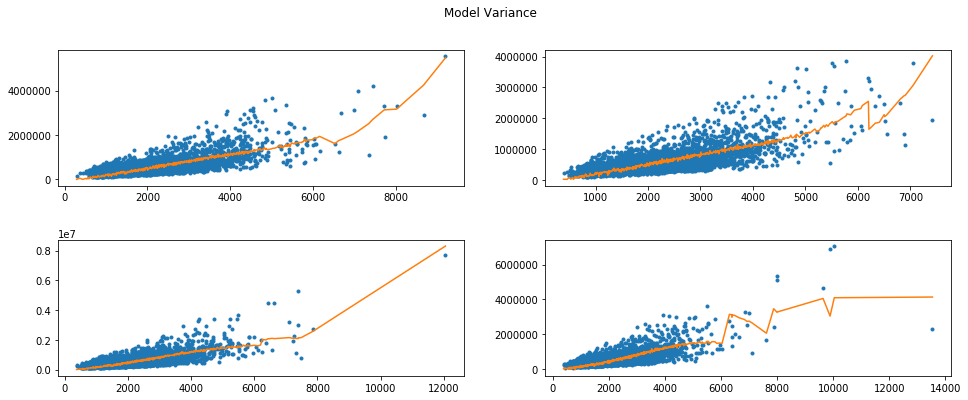

In [16]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Model Variance")
fig.add_subplot(221)

# degree 15 polynomial for set1
X = polynomial_dataframe(set_1['sqft_living'], 30)
Y = set_1['price']
X = sm.add_constant(X)
model_set1 = smf.OLS(Y, X).fit()
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set1.predict(X),'-')

# degree 15 polynomial for set2
X = polynomial_dataframe(set_2['sqft_living'], 30)
Y = set_2['price']
X = sm.add_constant(X)
model_set2 = smf.OLS(Y, X).fit()
fig.add_subplot(222)
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set2.predict(X),'-')

# degree 15 polynomial for set1
X = polynomial_dataframe(set_3['sqft_living'], 30)
Y = set_3['price']
X = sm.add_constant(X)
model_set3 = smf.OLS(Y, X).fit()
fig.add_subplot(223)
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set3.predict(X),'-')

# degree 15 polynomial for set4
X = polynomial_dataframe(set_4['sqft_living'], 30)
Y = set_4['price']
X = sm.add_constant(X)
model_set4 = smf.OLS(Y, X).fit()
fig.add_subplot(224)
plt.plot(X['power_1'], Y,'.',
        X['power_1'], model_set4.predict(X),'-')
plt.show()

In [17]:
model_set1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:35:23   Log-Likelihood:                -75044.
No. Observations:                5403   AIC:                         1.501e+05
Df Residuals:                    5374   BIC:                         1.503e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.901e-05   1.06e-06     55.689      0.000    5.69e-05    6.11e-05
power_1        0.0002   3.22e-06     55.689      0.000       0.000       0.000
power_2        0.2018      0.004     55.689      0.000       0.195       0.209
power_3    -4.827e-05   1.71e-06    -28.291      0.000   -5.16e-05   -4.49e-05
power_4     3.665e-09   1.62e-10     22.589      0.000    3.35e-09    3.98e-09
power_5     2.973e-14   9.03e-15      3.293      0.001     1.2e-14    4.74e-14
power_6     3.226e-15   7.44e-16      4.339      0.000    1.77e-15    4.68e-15
power_7     2.536e-16   7.18e-16      0.353      0.724   -1.15e-15    1.66e-15
power_8     3.757e-16   6.99e-16      0.538      0.591   -9.94e-16    1.75e-15
power_9    -9.267e-16   6.68e-16     -1.388      0.165   -2.24e-15    3.83e-16
power_10     1.48e-15   7.23e-16      2.046      0.041     6.2e-17     2.9e-15
power_11    1.505e-16   6.92e-16      0.217      0.828   -1.21e-15    1.51e-15
power_12    2.129e-16   7.17e-16      0.297      0.766   -1.19e-15    1.62e-15
power_13    2.623e-15   7.84e-16      3.345      0.001    1.09e-15    4.16e-15
power_14   -6.873e-16   7.45e-16     -0.922      0.357   -2.15e-15    7.74e-16
power_15    3.123e-15   7.08e-16      4.413      0.000    1.74e-15    4.51e-15
power_16   -7.863e-16   7.74e-16     -1.015      0.310    -2.3e-15    7.32e-16
power_17    3.639e-16   7.31e-16      0.498      0.619   -1.07e-15     1.8e-15
power_18     6.22e-16   7.41e-16      0.840      0.401    -8.3e-16    2.07e-15
power_19    2.472e-15   8.03e-16      3.078      0.002    8.98e-16    4.05e-15
power_20     1.19e-16   8.34e-16      0.143      0.887   -1.52e-15    1.75e-15
power_21     6.08e-16   6.74e-16      0.902      0.367   -7.14e-16    1.93e-15
power_22   -8.759e-17   7.63e-16     -0.115      0.909   -1.58e-15    1.41e-15
power_23   -1.638e-15   8.44e-16     -1.940      0.052   -3.29e-15     1.7e-17
power_24    9.284e-16   7.94e-16      1.169      0.242   -6.28e-16    2.48e-15
power_25   -3.578e-16   8.31e-16     -0.430      0.667   -1.99e-15    1.27e-15
power_26    3.033e-16   8.08e-16      0.375      0.708   -1.28e-15    1.89e-15
power_27   -1.328e-15   7.74e-16     -1.716      0.086   -2.85e-15    1.89e-16
power_28   -4.856e-16   8.04e-16     -0.604      0.546   -2.06e-15    1.09e-15
power_29   -4.922e-16   8.38e-16     -0.588      0.557   -2.13e-15    1.15e-15
power_30   -2.738e-15   8.39e-16     -3.266      0.001   -4.38e-15   -1.09e-15
==============================================================================
Omnibus:                     1983.558   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20207.966
Skew:                           1.459   Prob(JB):                         0.00
Kurtosis:                      12.014   Cond. No.                     3.93e+16
==

In [18]:
model_set2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:35:23   Log-Likelihood:                -75144.
No. Observations:                5403   AIC:                         1.503e+05
Df Residuals:                    5374   BIC:                         1.505e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.897e-05   1.55e-06     51.098      0.000    7.59e-05     8.2e-05
power_1        0.0002    4.1e-06     51.098      0.000       0.000       0.000
power_2        0.2252      0.004     51.098      0.000       0.217       0.234
power_3    -6.153e-05   2.26e-06    -27.202      0.000    -6.6e-05   -5.71e-05
power_4     5.466e-09   2.58e-10     21.224      0.000    4.96e-09    5.97e-09
power_5     5.094e-14    7.7e-15      6.618      0.000    3.58e-14     6.6e-14
power_6      1.97e-15   7.57e-16      2.603      0.009    4.86e-16    3.45e-15
power_7    -5.667e-16   7.22e-16     -0.784      0.433   -1.98e-15    8.49e-16
power_8     8.597e-16   7.11e-16      1.208      0.227   -5.35e-16    2.25e-15
power_9    -7.598e-16   6.79e-16     -1.118      0.263   -2.09e-15    5.72e-16
power_10    1.024e-15   7.44e-16      1.377      0.168   -4.34e-16    2.48e-15
power_11    1.624e-15    7.3e-16      2.225      0.026    1.93e-16    3.05e-15
power_12    8.765e-16   7.28e-16      1.204      0.229    -5.5e-16     2.3e-15
power_13    1.978e-15   7.97e-16      2.483      0.013    4.16e-16    3.54e-15
power_14   -2.441e-16   7.56e-16     -0.323      0.747   -1.73e-15    1.24e-15
power_15    3.191e-15   7.21e-16      4.426      0.000    1.78e-15     4.6e-15
power_16    -3.93e-16   7.86e-16     -0.500      0.617   -1.93e-15    1.15e-15
power_17   -1.121e-16   7.67e-16     -0.146      0.884   -1.62e-15    1.39e-15
power_18   -8.618e-16   7.48e-16     -1.153      0.249   -2.33e-15    6.04e-16
power_19    2.691e-15   8.29e-16      3.246      0.001    1.07e-15    4.32e-15
power_20    7.554e-17   8.41e-16      0.090      0.928   -1.57e-15    1.72e-15
power_21   -3.608e-16    6.8e-16     -0.531      0.596   -1.69e-15    9.72e-16
power_22   -2.571e-15   7.83e-16     -3.283      0.001   -4.11e-15   -1.04e-15
power_23   -7.917e-16   8.62e-16     -0.918      0.359   -2.48e-15    8.99e-16
power_24    1.111e-15   8.07e-16      1.376      0.169   -4.72e-16    2.69e-15
power_25    1.196e-15   8.42e-16      1.420      0.156   -4.55e-16    2.85e-15
power_26   -9.181e-16   8.13e-16     -1.130      0.259   -2.51e-15    6.75e-16
power_27   -2.647e-16   7.84e-16     -0.338      0.736    -1.8e-15    1.27e-15
power_28   -1.049e-15   8.29e-16     -1.265      0.206   -2.68e-15    5.77e-16
power_29    3.086e-16    8.5e-16      0.363      0.717   -1.36e-15    1.98e-15
power_30   -3.775e-16   8.48e-16     -0.445      0.656   -2.04e-15    1.29e-15
==============================================================================
Omnibus:                     1843.862   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18565.289
Skew:                           1.336   Prob(JB):                         0.00
Kurtosis:                      11.679   Cond. No.                     4.46e+16
==

In [19]:
model_set3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:35:23   Log-Likelihood:                -75144.
No. Observations:                5403   AIC:                         1.503e+05
Df Residuals:                    5374   BIC:                         1.505e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.334e-05   4.67e-07     71.364      0.000    3.24e-05    3.43e-05
power_1     7.901e-05   1.11e-06     71.364      0.000    7.68e-05    8.12e-05
power_2        0.1657      0.002     71.364      0.000       0.161       0.170
power_3    -2.963e-05   8.87e-07    -33.402      0.000   -3.14e-05   -2.79e-05
power_4     1.712e-09    6.5e-11     26.342      0.000    1.58e-09    1.84e-09
power_5    -2.176e-14   7.81e-15     -2.785      0.005   -3.71e-14   -6.44e-15
power_6     3.171e-15   7.52e-16      4.214      0.000     1.7e-15    4.65e-15
power_7     1.732e-16   7.37e-16      0.235      0.814   -1.27e-15    1.62e-15
power_8    -1.778e-16   7.12e-16     -0.250      0.803   -1.57e-15    1.22e-15
power_9    -1.451e-15   6.88e-16     -2.109      0.035    -2.8e-15   -1.02e-16
power_10    7.516e-17   7.32e-16      0.103      0.918   -1.36e-15    1.51e-15
power_11   -9.753e-17   7.17e-16     -0.136      0.892    -1.5e-15    1.31e-15
power_12    7.252e-16    7.2e-16      1.008      0.314   -6.86e-16    2.14e-15
power_13    1.628e-15   8.05e-16      2.024      0.043    5.08e-17    3.21e-15
power_14   -9.086e-16   7.57e-16     -1.200      0.230   -2.39e-15    5.75e-16
power_15    1.983e-15   7.29e-16      2.721      0.007    5.54e-16    3.41e-15
power_16     1.75e-15   7.92e-16      2.209      0.027    1.97e-16     3.3e-15
power_17    7.477e-16    7.5e-16      0.996      0.319   -7.23e-16    2.22e-15
power_18    1.891e-15   7.39e-16      2.559      0.011    4.42e-16    3.34e-15
power_19    1.697e-15   8.24e-16      2.060      0.039    8.24e-17    3.31e-15
power_20     2.16e-15   8.39e-16      2.576      0.010    5.16e-16     3.8e-15
power_21   -1.154e-15   6.82e-16     -1.691      0.091   -2.49e-15    1.84e-16
power_22   -4.789e-16   7.89e-16     -0.607      0.544   -2.03e-15    1.07e-15
power_23   -1.549e-15   8.55e-16     -1.811      0.070   -3.23e-15    1.27e-16
power_24   -3.839e-16   8.23e-16     -0.466      0.641      -2e-15    1.23e-15
power_25   -7.585e-16   8.47e-16     -0.896      0.370   -2.42e-15    9.02e-16
power_26   -1.928e-15   8.14e-16     -2.369      0.018   -3.52e-15   -3.32e-16
power_27    6.043e-17   7.81e-16      0.077      0.938   -1.47e-15    1.59e-15
power_28   -8.564e-16   8.29e-16     -1.033      0.302   -2.48e-15    7.69e-16
power_29   -1.299e-16   8.46e-16     -0.154      0.878   -1.79e-15    1.53e-15
power_30   -1.591e-15   8.55e-16     -1.862      0.063   -3.27e-15     8.4e-17
==============================================================================
Omnibus:                     2206.665   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34558.043
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                      15.006   Cond. No.                     3.22e+16
==

In [20]:
model_set4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:35:23   Log-Likelihood:                -75378.
No. Observations:                5404   AIC:                         1.508e+05
Df Residuals:                    5375   BIC:                         1.510e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.416e-05   3.74e-07     64.641      0.000    2.34e-05    2.49e-05
power_1     5.539e-05   8.57e-07     64.641      0.000    5.37e-05    5.71e-05
power_2        0.1322      0.002     64.641      0.000       0.128       0.136
power_3    -1.464e-05   6.73e-07    -21.758      0.000    -1.6e-05   -1.33e-05
power_4     4.655e-10   4.35e-11     10.707      0.000     3.8e-10    5.51e-10
power_5    -9.438e-14   7.16e-15    -13.189      0.000   -1.08e-13   -8.04e-14
power_6     3.033e-15   7.88e-16      3.850      0.000    1.49e-15    4.58e-15
power_7    -1.573e-15   7.58e-16     -2.076      0.038   -3.06e-15   -8.74e-17
power_8    -6.055e-16   7.39e-16     -0.819      0.413   -2.06e-15    8.44e-16
power_9    -1.134e-15   7.09e-16     -1.600      0.110   -2.52e-15    2.56e-16
power_10    1.403e-15    7.7e-16      1.821      0.069   -1.07e-16    2.91e-15
power_11   -5.547e-16   7.42e-16     -0.748      0.455   -2.01e-15    8.99e-16
power_12   -9.143e-16    7.5e-16     -1.218      0.223   -2.39e-15    5.57e-16
power_13    1.444e-15    8.3e-16      1.739      0.082   -1.83e-16    3.07e-15
power_14    5.265e-16    7.8e-16      0.675      0.500      -1e-15    2.06e-15
power_15    2.715e-15   7.57e-16      3.588      0.000    1.23e-15     4.2e-15
power_16    1.156e-15   8.21e-16      1.408      0.159   -4.53e-16    2.77e-15
power_17    3.274e-16   7.79e-16      0.420      0.674    -1.2e-15    1.85e-15
power_18    1.345e-15   7.77e-16      1.731      0.083   -1.78e-16    2.87e-15
power_19    1.329e-15   8.49e-16      1.565      0.118   -3.36e-16    2.99e-15
power_20    2.002e-15   8.71e-16      2.297      0.022    2.93e-16    3.71e-15
power_21   -5.644e-16   7.11e-16     -0.794      0.427   -1.96e-15    8.29e-16
power_22   -8.232e-16   8.16e-16     -1.009      0.313   -2.42e-15    7.77e-16
power_23   -1.156e-15   8.92e-16     -1.296      0.195    -2.9e-15    5.92e-16
power_24      1.8e-15   8.38e-16      2.147      0.032    1.57e-16    3.44e-15
power_25    1.555e-15   8.72e-16      1.783      0.075   -1.55e-16    3.26e-15
power_26   -1.124e-15   8.47e-16     -1.328      0.184   -2.78e-15    5.36e-16
power_27    1.056e-15   8.19e-16      1.290      0.197    -5.5e-16    2.66e-15
power_28   -1.907e-15   8.57e-16     -2.225      0.026   -3.59e-15   -2.27e-16
power_29   -3.854e-16   8.76e-16     -0.440      0.660    -2.1e-15    1.33e-15
power_30   -1.894e-15   8.77e-16     -2.161      0.031   -3.61e-15   -1.76e-16
==============================================================================
Omnibus:                     2056.766   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52938.318
Skew:                           1.246   Prob(JB):                         0.00
Kurtosis:                      18.129   Cond. No.                     3.10e+16
==

#### Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

In [21]:
from sklearn.model_selection import train_test_split
X = sales['sqft_living']
y = sales['price']
# obtain 10% test data and remaining 90%
X_remaining, X_test, y_remaining, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
# obtain 45% train and 45% validation data
X_train, X_val, y_train, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=5)

In [22]:
X_train.head()

15464    1170
9997     1550
19314    1120
17551    3160
6338     2000
Name: sqft_living, dtype: int64

In [23]:
X_test.head()

8253      960
20648    3056
8539     1590
16276    1460
7604     1320
Name: sqft_living, dtype: int64

In [24]:
X_val.head()

4399     4400
16619     720
3975      990
1545     1730
869      2180
Name: sqft_living, dtype: int64

* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build a dataframe of polynomial data of train_data['sqft_living'] at the current degree
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data 
        * (here you will want to use .predict()) for that degree and you will need to make a polynmial dataframe using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

In [25]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions=model.predict(data)    
    # Then compute the residuals/errors
    RSS = outcome - predictions
    # Then square and add them up
    RSS =(RSS * RSS).sum()
    return(RSS)    
rss_list = []
for i in range(1, 15+1):
    # poly dataframe using training data
    X_train_poly = polynomial_dataframe(X_train, i)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)    
    
    # making polynomial dataframe using validation data
    X_val_poly = polynomial_dataframe(X_val, i)
      
    rss = get_residual_sum_of_squares(model, X_val_poly, y_val)
   
    # calcualte rss using sklearn
    #from sklearn import metrics
    #rss2 = poly_df.shape[0] * metrics.mean_squared_error(model.predict(poly_df), y_val)
    
    rss_list.append(rss)
    print("{} {:E}" .format(i ,rss))

1 7.105428E+14
2 6.568164E+14
3 6.701197E+14
4 1.147110E+15
5 8.451907E+14
6 8.459841E+14
7 8.448574E+14
8 8.446345E+14
9 8.445672E+14
10 8.434189E+14
11 8.462365E+14
12 8.454555E+14
13 8.461605E+14
14 8.463271E+14
15 8.466231E+14


In [26]:
# find the smallest RSS on validation set
min_index = np.argmin(rss_list) + 1
min_index

2

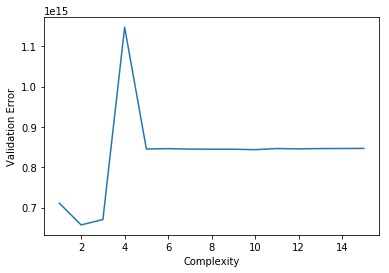

In [27]:
# plotting complexity vs validation error
plt.plot(list(np.arange(1,16,1)), rss_list)
plt.xlabel("Complexity")
plt.ylabel("Validation Error")
plt.show()

#### Test Error

In [28]:
from sklearn import metrics
X_train_poly = polynomial_dataframe(X_train, min_index)
model = LinearRegression()
model.fit(X_train_poly, y_train)    
rss_train = get_residual_sum_of_squares(model, X_train_poly, y_train)
#rss_train = X_train_poly.shape[0] * metrics.mean_squared_error(model.predict(X_train_poly), y_train)


X_test_poly = polynomial_dataframe(X_test, min_index)

rss_test = get_residual_sum_of_squares(model, X_test_poly, y_test)

print("Training Error: {:E}" .format(rss_train))
print("Test Error: {:E}" .format(rss_test))
#print("Validation Error: {:E}".format(rss_list[min_index]))

Training Error: 5.885015E+14
Test Error: 1.207261E+14


In [29]:
X_test_poly.head()

,power_1,power_2
8253,960,921600
20648,3056,9339136
8539,1590,2528100
16276,1460,2131600
7604,1320,1742400


In [30]:
X_train_poly.head()

,power_1,power_2
15464,1170,1368900
9997,1550,2402500
19314,1120,1254400
17551,3160,9985600
6338,2000,4000000


In [31]:
X_val_poly.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
4399,4400,19360000,85184000000,374809600000000,1649162240000000000,6743435032146214912,8749670918386614272,197159069268574208,502933317377589248,-702692383753502720,7206515867792703488,-1283244418823880704,-1571756269952303104,1801439850948198400,-5764607523034234880
16619,720,518400,373248000,268738560000,193491763200000,139314069504000000,8072409674332241920,1410582300705423360,1048332453879480320,-1517140228865785856,-3983064434502270976,-8561061416654602240,-2751699372323373056,-7421932185906577408,5764607523034234880
3975,990,980100,970299000,960596010000,950990049900000,941480149401000000,-8718599852197132416,1662372820909064448,3988870139823709696,1378206651628553216,-634476342239135744,-942280310619631616,7926440245751832576,7309611967754813440,5392171183121072128
1545,1730,2992900,5177717000,8957450410000,15496389209300000,8362009258379448384,4028663208157237376,-3281909750189850368,3893306874100761088,2359305290330342400,4867711981681444864,-9020313376365473792,803345246011006976,6281470070825697280,1810963113530392576
869,2180,4752400,10360232000,22585305760000,49235966556800000,-3346057348433309696,-7941110469342248960,-8574882026543316992,-6691071196655255552,4839353595798224896,-1746771321733251072,-7932202194319704064,-7601586551104995328,-6282503217712463872,-8372911920683941888


#### Reflection

Polynomial regression is a model which has polynomial degrees of the input variable. Some people call them feature transformations.
In this notebook, sqft_living is the predictor variable and price is the dependent variable. 
The polynomial features are sqft_living, sqft_living_squared, sqft_living_cubed, sqft_living_raised_to_four,.... 
I wrote a function that creates polynomial features up to a given degree. 
The house price data is split into 2 parts: 90% Train_Validation_Set, 10% Test_Set
90% Train_Val_set is further split into two equal parts: 50% Training Set, 50% Validation Set.

* Training Set: 45%
* Validation Set: 45%
* Test Set: 10%
    
The model is trained on training data. It is good to use the Validation Set, to select hyper-parameters like degree of a polynomial. The smallest validation error is found to be a 2 degree polynomial model = sqft + sqft^2 + intercept

The 2 degree polynomial model is tested on the test-set. The test-error is an approximation of generalization error.

I also tested how much a complex model varies for different dataset. The 4 graphs show the variation, it is not very wiggly because the data is very large. It is also sorted by sqft_living, price. Generally price increases as sqft_living increases.